# Import Libraries

In [1]:
#import the all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import minmax_scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (roc_curve,confusion_matrix,accuracy_score,plot_confusion_matrix,ConfusionMatrixDisplay,
                             balanced_accuracy_score,precision_score,cohen_kappa_score,
                             recall_score,f1_score,auc)

- Our data set name is 'wisc_bc_data.csv' which includes 32 columns(features) and our main target is to predict the cancer either it is benign or malignant

In [2]:
#read the data and get first 5 entries
wisc=pd.read_csv('c:/Users/jadha/Data/wisc_bc_data.csv')
wisc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Exploratory Data Analysis

In [3]:
wisc.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
wisc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#check the data is balanced or inbalanced
cancers=wisc['diagnosis'].value_counts()
cancers

B    357
M    212
Name: diagnosis, dtype: int64

## Data understanding

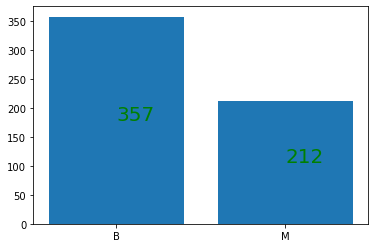

In [6]:
#bar plotwhich show count of melignant and benin cancer
plt.bar(x=cancers.index,height=cancers.values)
for i in range (2):
    plt.text(i,cancers[i]/2,cancers[i],c='green',size=20)

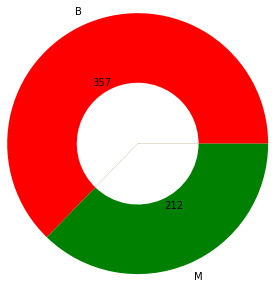

In [7]:
c=['r','g',]
plt.pie(cancers.values,labels=cancers.index,colors=c,radius=1.5)
plt.pie(cancers.values,labels=cancers.values,colors=['white','white',],radius=0.7)
plt.show()

- Above graph will show that the data is inbalnced

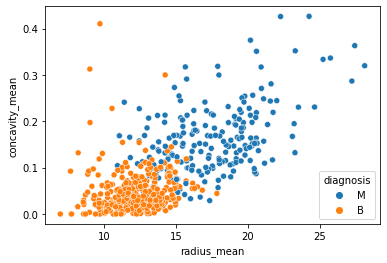

In [8]:
sns.scatterplot(x='radius_mean',y='concavity_mean',hue='diagnosis',data=wisc);

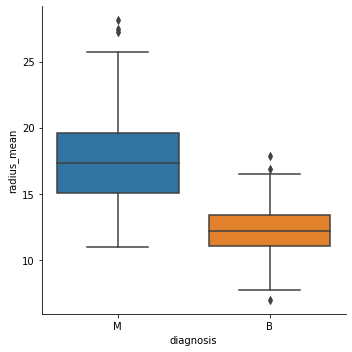

In [9]:
sns.catplot(x='diagnosis',y='radius_mean',data=wisc,kind='box');

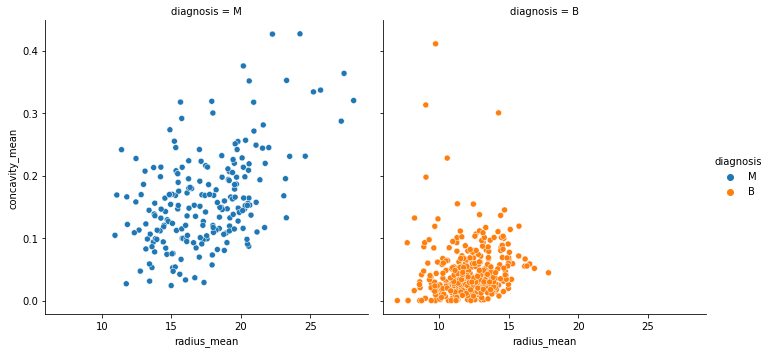

In [10]:
sns.relplot(x='radius_mean',y='concavity_mean',data=wisc,col='diagnosis',hue='diagnosis');

# Outliyers Handaling

- Outlier is an extremely high or extremely low value in our data.

- Lets use box plot for outlier visualization.

- horizontal line on the bottom side of box plot represent the 'min' value of dataset and Horizontal line on top side of box plot represent the 'max' value of dataset. Any value which is outside this range is outlier and represented by 'o'

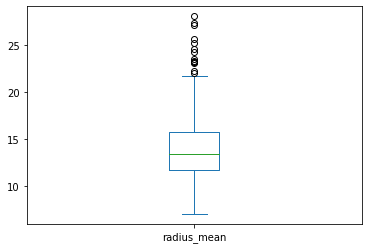

In [11]:
wisc.plot(y='radius_mean',kind='box');

In [12]:
# finding lower and upper limit of boxplot
dfr = wisc.radius_mean
dfr_Q1 = wisc.radius_mean.quantile(0.25)
dfr_Q3 = wisc.radius_mean.quantile(0.75)
from scipy.stats import iqr
dfr_IQR=iqr(wisc['radius_mean'])
dfr_low = dfr_Q1 - (1.5 * dfr_IQR)
dfr_top = dfr_Q3 + (1.5 * dfr_IQR)

In [13]:
# finding outliers
dfr_outliers = dfr[(dfr < dfr_low) | (dfr > dfr_top)]
dfr_outliers

82     25.22
108    22.27
122    24.25
164    23.27
180    27.22
202    23.29
212    28.11
236    23.21
339    23.51
352    25.73
369    22.01
461    27.42
503    23.09
521    24.63
Name: radius_mean, dtype: float64

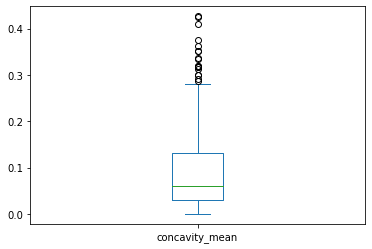

In [14]:
wisc.plot(y='concavity_mean',kind='box');

In [15]:
#finding lower and upper limit of boxplot
dfc = wisc.concavity_mean
dfc_Q1 = wisc.concavity_mean.quantile(0.25)
dfc_Q3 = wisc.concavity_mean.quantile(0.75)
from scipy.stats import iqr
dfc_IQR=iqr(wisc['concavity_mean'])
dfc_low = dfc_Q1 - (1.5 * dfc_IQR)
dfc_top = dfc_Q3 + (1.5 * dfc_IQR)

In [16]:
# finding outliers
dfc_outliers = dfc[(dfr < dfc_low) | (dfc > dfc_top)]
dfc_outliers

0      0.3001
68     0.3130
78     0.3754
82     0.3339
108    0.4264
112    0.3003
122    0.4268
152    0.4108
180    0.2871
202    0.3523
212    0.3201
258    0.3176
351    0.2914
352    0.3368
400    0.3189
461    0.3635
563    0.3174
567    0.3514
Name: concavity_mean, dtype: float64

- 82,108,122,180,202,212,352,461 this are the comman outliyers bettet to remove it

In [17]:
wisc=wisc.drop([82,108,122,180,202,212,352,461])

In [18]:
wisc.shape

(561, 32)

# Feature selections

In [21]:
#geting the name of all columns
wisc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [22]:
x=wisc.iloc[:,2:12]
y=wisc['diagnosis']

In [23]:
#finding the best parameters
best=SelectKBest(score_func=f_classif,k=6)
best.fit(x,y)
best.get_support()

array([ True, False,  True,  True, False,  True,  True,  True, False,
       False])

In [24]:
x.columns[best.get_support()]

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean'],
      dtype='object')

as we know that perimeter and area both are the function of radius i,e if radius increges then also area as well as perimeter also increges to avoide this problem i am using only radius as output feature

In [25]:
#preparing x&y
x=wisc[['radius_mean','concave points_mean','compactness_mean']]
y=wisc['diagnosis']

In [26]:
#describe the features
x.describe()

,radius_mean,concave points_mean,compactness_mean
count,561.000000,561.000000,561.000000
mean,13.965988,0.047054,0.102591
std,3.269261,0.035730,0.050820
min,6.981000,0.000000,0.019380
25%,11.680000,0.020270,0.063760
50%,13.280000,0.033230,0.091820
75%,15.700000,0.070170,0.129600
max,24.630000,0.160400,0.345400


# Feature scaling

In [27]:
#minmax scaling
x_scale=minmax_scale(x)
x_scale

array([[0.62377472, 0.91708229, 0.7920373 ],
       [0.76995864, 0.43746883, 0.18176799],
       [0.72009746, 0.79738155, 0.4310165 ],
       ...,
       [0.54501671, 0.33054863, 0.25434022],
       [0.77165845, 0.94763092, 0.79019692],
       [0.04413848, 0.        , 0.07435127]])

In [28]:
# check lower limit and upper limit of scaled data
np.min(x_scale[:,0]),np.max(x_scale[:,0])

(0.0, 0.9999999999999998)

In [29]:
# split data in train and test
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.25,random_state=10)
x_train.shape,x_test.shape

((420, 3), (141, 3))

# Dummy classifier

In [30]:
#create dummy classifier for refrance
dummy_clf=DummyClassifier(strategy='constant',constant='M')
dummy_clf.fit(x_train,y_train)
y_predict=dummy_clf.predict(x_test)
print(y_predict)
print('score of dummy classifier: ', dummy_clf.score(x_test,y_test))

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']
score of dummy classifier:  0.3829787234042553


In [31]:
#ploting confussion matrix of dummy classifier
confusion_matrix(y_test,y_predict)

array([[ 0, 87],
       [ 0, 54]], dtype=int64)

In [32]:
# roc parameters for dummy classifier
dummy_prob=dummy_clf.predict_proba(x_test)
dummy_fpr,dummy_tpr,dummy_threshold=roc_curve(y_test,dummy_prob[:,1],pos_label='M')
dummy_fpr,dummy_tpr,dummy_threshold

(array([0., 1.]), array([0., 1.]), array([2., 1.]))

In [33]:
#Auc score
print('auc :',auc(dummy_fpr,dummy_tpr))

auc : 0.5


# KNN

## Hyper Parameter Tuning

In [34]:
parameters={'n_neighbors':[1,3,5,7,9],'p':[1,2],'weights':['uniform','distance']}
clf=KNeighborsClassifier()

In [35]:
#appling Gridsearch cv to find the best hyper parameters
grid_clf=GridSearchCV(estimator=KNeighborsClassifier(),
            param_grid=parameters,
            cv=4,return_train_score=True)
grid_clf.fit(x_train,y_train) #model fiting
grid_clf.score(x_train,y_train) #train score

0.9142857142857143

In [36]:
results=grid_clf.cv_results_
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'param_p', 'param_weights', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'mean_train_score', 'std_train_score'])

In [37]:
results['params']

[{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 1, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'},
 {'n_neighbors': 1, 'p': 2, 'weights': 'distance'},
 {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 3, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'},
 {'n_neighbors': 3, 'p': 2, 'weights': 'distance'},
 {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 5, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'},
 {'n_neighbors': 5, 'p': 2, 'weights': 'distance'},
 {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 7, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'},
 {'n_neighbors': 7, 'p': 2, 'weights': 'distance'},
 {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 9, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'},
 {'n_neighbors': 9, 'p

In [38]:
len(results['params'])

20

In [39]:
#get best parameter
grid_clf.best_params_

{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}

## Model bulding

In [40]:
#model using KNN
knn_clf=KNeighborsClassifier(n_neighbors=5,p=2,weights='distance')
knn_clf.fit(x_train,y_train)
knn_clf.score(x_test,y_test)

0.9290780141843972

In [41]:
#prediction
y_predict=knn_clf.predict(x_test)

In [43]:
# confusion matrix
cm1=confusion_matrix(y_test,y_predict)
cm1

array([[84,  3],
       [ 7, 47]], dtype=int64)

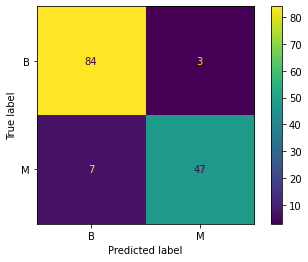

In [44]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=knn_clf.classes_)
disp.plot();

## Model evalution

### Manual calculations

In [45]:
accuracy=(86+46)/(86+5+6+46)
accuracy

0.9230769230769231

In [46]:
balanced_accuracy=(86/91+46/52)/2
balanced_accuracy

0.9148351648351648

In [47]:
precision=86/(86+6)
precision

0.9347826086956522

In [48]:
recall=86/(86+5)
recall

0.945054945054945

In [49]:
f_score=2*precision*recall/(precision+recall)
f_score

0.9398907103825138

### Direct calculations

In [50]:
# Performance matrix
print('acurracy score :',accuracy_score(y_test,y_predict))
print('balanced accuracy score :',balanced_accuracy_score(y_test,y_predict))
print('precision score :',precision_score(y_test,y_predict,pos_label='B'),)
print('recall score :',recall_score(y_test,y_predict,pos_label='B'))
print('f1 score :',f1_score(y_test,y_predict,pos_label='B'))
print('kappa score :',cohen_kappa_score(y_test,y_predict))

acurracy score : 0.9290780141843972
balanced accuracy score : 0.9179438058748404
precision score : 0.9230769230769231
recall score : 0.9655172413793104
f1 score : 0.9438202247191013
kappa score : 0.8477979274611399


In [51]:
# roc parameters for knn
knn_prob=knn_clf.predict_proba(x_test)
knn_fpr,knn_tpr,knn_threshold=roc_curve(y_test,knn_prob[:,1],pos_label='M')
knn_fpr,knn_tpr,knn_threshold

(array([0.        , 0.        , 0.        , 0.01149425, 0.01149425,
        0.03448276, 0.03448276, 0.05747126, 0.05747126, 0.06896552,
        0.06896552, 0.14942529, 0.14942529, 0.1954023 , 1.        ]),
 array([0.        , 0.64814815, 0.75925926, 0.75925926, 0.77777778,
        0.77777778, 0.88888889, 0.88888889, 0.94444444, 0.94444444,
        0.96296296, 0.96296296, 1.        , 1.        , 1.        ]),
 array([2.        , 1.        , 0.83477889, 0.82782475, 0.8188309 ,
        0.80457028, 0.46820189, 0.444018  , 0.3475031 , 0.34300891,
        0.31234145, 0.18780731, 0.1617029 , 0.11278915, 0.        ]))

In [52]:
#Auc score-KNN
print('auc :',auc(knn_fpr,knn_tpr))

auc : 0.9859514687100894


# Decision Tree

In [53]:
#Decision tree
dt_clf=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt_clf.fit(x_train,y_train)
dt_clf.score(x_test,y_test)

0.9219858156028369

In [54]:
#prediction of test sampals
y_predict=dt_clf.predict(x_test)

In [55]:
cm2=confusion_matrix(y_test,y_predict)
cm2

array([[82,  5],
       [ 6, 48]], dtype=int64)

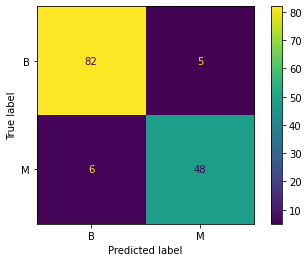

In [56]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=dt_clf.classes_)
disp.plot();

## Model evalution

### Direct Calculation 

In [57]:
# Performance matrix
print('acurracy score :',accuracy_score(y_test,y_predict))
print('balanced accuracy score :',balanced_accuracy_score(y_test,y_predict))
print('precision score :',precision_score(y_test,y_predict,pos_label='M'),)
print('recall score :',recall_score(y_test,y_predict,pos_label='M'))
print('f1 score :',f1_score(y_test,y_predict,pos_label='M'))
print('kappa score :',cohen_kappa_score(y_test,y_predict))

acurracy score : 0.9219858156028369
balanced accuracy score : 0.9157088122605364
precision score : 0.9056603773584906
recall score : 0.8888888888888888
f1 score : 0.897196261682243
kappa score : 0.8343479653957064


In [58]:
# Roc parameters for Decision Tree
dt_prob=dt_clf.predict_proba(x_test)
dt_fpr,dt_tpr,dt_threshold=roc_curve(y_test,dt_prob[:,1],pos_label='M')
dt_fpr,dt_tpr,dt_threshold

(array([0.        , 0.02298851, 0.05747126, 0.05747126, 0.06896552,
        0.09195402, 0.43678161, 1.        ]),
 array([0.        , 0.74074074, 0.88888889, 0.90740741, 0.90740741,
        0.90740741, 0.90740741, 1.        ]),
 array([2.        , 1.        , 0.53333333, 0.5       , 0.33333333,
        0.28571429, 0.01818182, 0.        ]))

In [59]:
#auc score -Decision Tree
print('auc :',auc(dt_fpr,dt_tpr))

auc : 0.9179438058748404


# Random Forest Classifier

## Model Bulding

In [60]:
# Applaing Random forest classifier
rf_clf=RandomForestClassifier(n_estimators=10,criterion='entropy')
rf_clf.fit(x_train,y_train)
rf_clf.score(x_train,y_train),rf_clf.score(x_test,y_test)

(0.9976190476190476, 0.9290780141843972)

In [61]:
#predictions -Random Forest
y_predict=rf_clf.predict(x_test)

## Model evalution

### Direct calculation

In [62]:
# performance matrix
print('acurracy score :',accuracy_score(y_test,y_predict))
print('balanced accuracy score :',balanced_accuracy_score(y_test,y_predict))
print('precision score :',precision_score(y_test,y_predict,pos_label='M'),)
print('recall score :',recall_score(y_test,y_predict,pos_label='M'))
print('f1 score :',f1_score(y_test,y_predict,pos_label='M'))
print('kappa score :',cohen_kappa_score(y_test,y_predict))

acurracy score : 0.9290780141843972
balanced accuracy score : 0.9179438058748404
precision score : 0.94
recall score : 0.8703703703703703
f1 score : 0.9038461538461539
kappa score : 0.8477979274611399


In [63]:
cm3=confusion_matrix(y_test,y_predict)

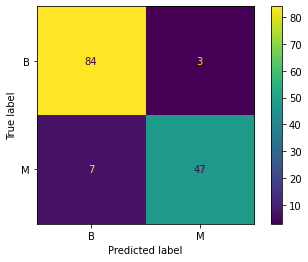

In [64]:
# plot confussion matrix
disp=ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=rf_clf.classes_)
disp.plot();

In [65]:
# Roc parameters -Random forest classifier
rf_prob=rf_clf.predict_proba(x_test)
rf_fpr,rf_tpr,rf_threshold=roc_curve(y_test,rf_prob[:,1],pos_label='M')
rf_fpr,rf_tpr,rf_threshold

(array([0.        , 0.01149425, 0.02298851, 0.02298851, 0.03448276,
        0.03448276, 0.12643678, 0.14942529, 0.25287356, 1.        ]),
 array([0.        , 0.53703704, 0.7037037 , 0.74074074, 0.85185185,
        0.88888889, 0.96296296, 0.96296296, 0.96296296, 1.        ]),
 array([2. , 1. , 0.9, 0.8, 0.7, 0.5, 0.3, 0.2, 0.1, 0. ]))

In [66]:
# Auc score -Decision Tree
print('auc :',auc(rf_fpr,rf_tpr))

auc : 0.959557258407833


# Cross validation

In [70]:
#cross validate the classifier and finding it's performance
dt_clf=DecisionTreeClassifier(criterion='entropy')
knn_clf=KNeighborsClassifier(n_neighbors=7,p=1,weights='uniform')
dt_score=[]
knn_score=[]
rf_score=[]
kf=KFold(n_splits=5,shuffle=True,random_state=10)
for train_index,test_index in kf.split(x,y):
    x_train=x.iloc[train_index]
    x_test=x.iloc[test_index]
    y_train=y.iloc[train_index]
    y_test=y.iloc[test_index]
    
    dt_clf.fit(x_train,y_train) #decision tree
    knn_clf.fit(x_train,y_train) #KNN classifier
    rf_clf.fit(x_train,y_train) #Random Forest Classifier
    dt_score.append(dt_clf.score(x_test,y_test))
    knn_score.append(knn_clf.score(x_test,y_test))
    rf_score.append(rf_clf.score(x_test,y_test))
print('dicision tree score :',np.mean(np.array(dt_score)))
print('knn score :',np.mean(np.array(knn_score)))
print('random forest score:',np.mean(np.array(rf_score)))

dicision tree score : 0.8840707964601769
knn score : 0.8983565107458912
random forest score: 0.8930151706700379


# Results comparision

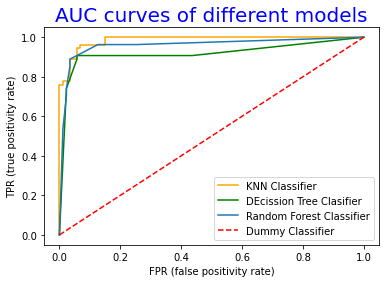

In [71]:
plt.plot(knn_fpr,knn_tpr,c='orange',label='KNN Classifier')
plt.plot(dt_fpr,dt_tpr,c='green',label='DEcission Tree Clasifier')
plt.plot(rf_fpr,rf_tpr,label='Random Forest Classifier')
plt.plot(dummy_fpr,dummy_tpr,c='r',ls='--',label='Dummy Classifier')
plt.legend()
plt.xlabel('FPR (false positivity rate)')
plt.ylabel('TPR (true positivity rate)')
plt.title('AUC curves of different models',c='b',size=20)
plt.show()

here,we observed that the area under the curve is large for KNN i,e 0.9859 so from above results we can canclude that KNN is the best classifier for this cancer detection. 